# Text Classification of StackOverflow using TF-IDF Vectors

In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


from definitions import TALOS_DIR
from app.preprocessing import load_dataset,preprocess_data
from app.models import load_model


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. Format into *lowercase*
2. Remove some of the *punctuation* characters
3. Remove *Numbers*
4. Remove *stopwords*
5. Remove *links*
6. Apply Stemmings

In [2]:
data = load_dataset(load_from_pickle=True, input_ins='as_tf_idf')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


## MLP classifier in Keras using not standardized tf*idf features

 ### Hyper parameter tuning for the **tf-idf** model

In [3]:
# 70% Train & 10% HeldOut & 20% Test
model_data_tf = preprocess_data(data, 'tags', 'post',
                                input_ins='as_tf_idf',
                                cv_split_full=0.2,
                                cv_split_dev=0.125)


In [4]:
'''Use the test filename if ypu don't want to delete
    # your current logs from the previous run.'''
TALOS_TF_LOG_FILENAME = 'talos_tf_log'
talos_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_TF_LOG_FILENAME)

###### Production configuration
tf_idf_model_config = {
    'visualize_proccess': [False],
    'first_neuron': [64, 128],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'epochs': [4, 5, 7, 10],
    'batch_size': [32, 64],
    'model_type': ['keras_tf_idf_model'],
}

history_model_tf_idf = ta.Scan(model_data_tf['x_train'],
                               model_data_tf['y_train'],
                               x_val=model_data_tf['x_train_dev'],
                               y_val=model_data_tf['y_train_dev'],
                               model=load_model,
                               params=tf_idf_model_config,
                               grid_downsample=0.2,
                               print_params=True,
                               seed=123,
                               last_epoch_value=True,
                               dataset_name=talos_tf_log_pathname
                               )


  0%|          | 0/38 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


  3%|▎         | 1/38 [00:13<08:24, 13.63s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


  5%|▌         | 2/38 [00:21<07:11, 11.98s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


  8%|▊         | 3/38 [00:34<07:09, 12.28s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 11%|█         | 4/38 [00:50<07:30, 13.25s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 13%|█▎        | 5/38 [01:06<07:41, 14.00s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 16%|█▌        | 6/38 [01:18<07:14, 13.57s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 18%|█▊        | 7/38 [01:45<09:05, 17.61s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 21%|██        | 8/38 [02:27<12:26, 24.87s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 24%|██▎       | 9/38 [03:06<14:08, 29.26s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 26%|██▋       | 10/38 [03:33<13:13, 28.34s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 29%|██▉       | 11/38 [03:57<12:16, 27.27s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 32%|███▏      | 12/38 [04:25<11:50, 27.32s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 34%|███▍      | 13/38 [04:47<10:42, 25.69s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 37%|███▋      | 14/38 [05:13<10:17, 25.72s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 39%|███▉      | 15/38 [05:34<09:24, 24.55s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 42%|████▏     | 16/38 [06:15<10:47, 29.45s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 45%|████▍     | 17/38 [06:30<08:44, 24.96s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 47%|████▋     | 18/38 [07:10<09:51, 29.57s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 50%|█████     | 19/38 [08:13<12:33, 39.66s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 53%|█████▎    | 20/38 [08:37<10:29, 34.99s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 55%|█████▌    | 21/38 [08:55<08:25, 29.73s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 58%|█████▊    | 22/38 [09:38<09:01, 33.87s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 61%|██████    | 23/38 [09:54<07:07, 28.48s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 63%|██████▎   | 24/38 [10:31<07:14, 31.01s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 66%|██████▌   | 25/38 [10:44<05:33, 25.66s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 68%|██████▊   | 26/38 [10:57<04:20, 21.68s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 71%|███████   | 27/38 [11:09<03:28, 18.91s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 74%|███████▎  | 28/38 [11:22<02:52, 17.24s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 76%|███████▋  | 29/38 [11:36<02:24, 16.08s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 79%|███████▉  | 30/38 [11:49<02:01, 15.20s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 82%|████████▏ | 31/38 [11:58<01:32, 13.26s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 84%|████████▍ | 32/38 [12:11<01:20, 13.36s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 87%|████████▋ | 33/38 [12:25<01:06, 13.31s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 89%|████████▉ | 34/38 [12:33<00:47, 11.79s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


 92%|█████████▏| 35/38 [12:47<00:37, 12.44s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 95%|█████████▍| 36/38 [12:56<00:22, 11.39s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_tf_idf_model'}


 97%|█████████▋| 37/38 [13:04<00:10, 10.48s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_tf_idf_model'}


100%|██████████| 38/38 [13:24<00:00, 13.44s/it]


    Finds the best model configuration set for the TF-IDF, after the Talos Scanning.

In [5]:
report_tf = ta.Reporting(history_model_tf_idf)
best_model_idx = report_tf.data['val_f1'].idxmax()
best_model_params = report_tf.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 3,
 'val_loss': 0.535002788066864,
 'val_f1': 0.8312663917541504,
 'val_categorical_accuracy': 0.82825,
 'loss': 0.36163468376227786,
 'f1': 0.8820167682511466,
 'categorical_accuracy': 0.8905357142857143,
 'visualize_proccess': 'False',
 'first_neuron': 128,
 'activation': 'relu',
 'dropout': 0.2,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'epochs': 10,
 'batch_size': 32,
 'model_type': 'keras_tf_idf_model'}

    Trains and fit the MLP Network  using the best selected features.

In [6]:
model_tf_history, model_tf = load_model(model_data_tf['x_train'],
                                        model_data_tf['y_train'],
                                        model_data_tf['x_train_dev'],
                                        model_data_tf['y_train_dev'],
                                        best_model_params)

### Visualize Model History Scores

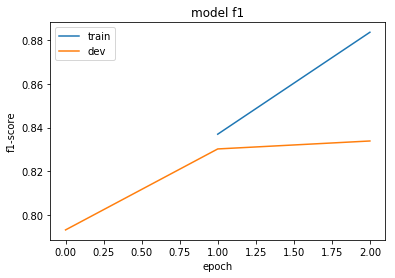

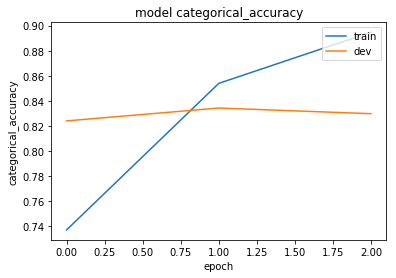

In [7]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_tf_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [8]:
score_tf = model_tf.evaluate(model_data_tf['x_test'],
                             model_data_tf['y_test'],
                             batch_size=best_model_params['batch_size'],
                             verbose=1)

print('\nTest f1: %.4f' % (score_tf[1]))
print('\nTest categorical accuracy: %.4f'% (score_tf[2]))

8000/8000 [==============================] - 0s 49us/step

Test f1: 0.8190

Test categorical accuracy: 0.8189


### Visualize Prediction Perfomance of **non-standardized** TF-IDF  model

--------------------------------------------------------------------------------
Accuracy Score: 81.89%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.717     0.672     0.694       400
           1      0.931     0.905     0.918       400
           2      0.982     0.960     0.971       400
           3      0.844     0.772     0.807       400
           4      0.837     0.897     0.866       400
           5      0.608     0.723     0.661       400
           6      0.857     0.780     0.817       400
           7      0.825     0.882     0.853       400
           8      0.683     0.748     0.714       400
           9      0.680     0.698     0.689       400
          10      0.710     0.672     0.691       400
          11      0.847     0.897     0.871       400
       

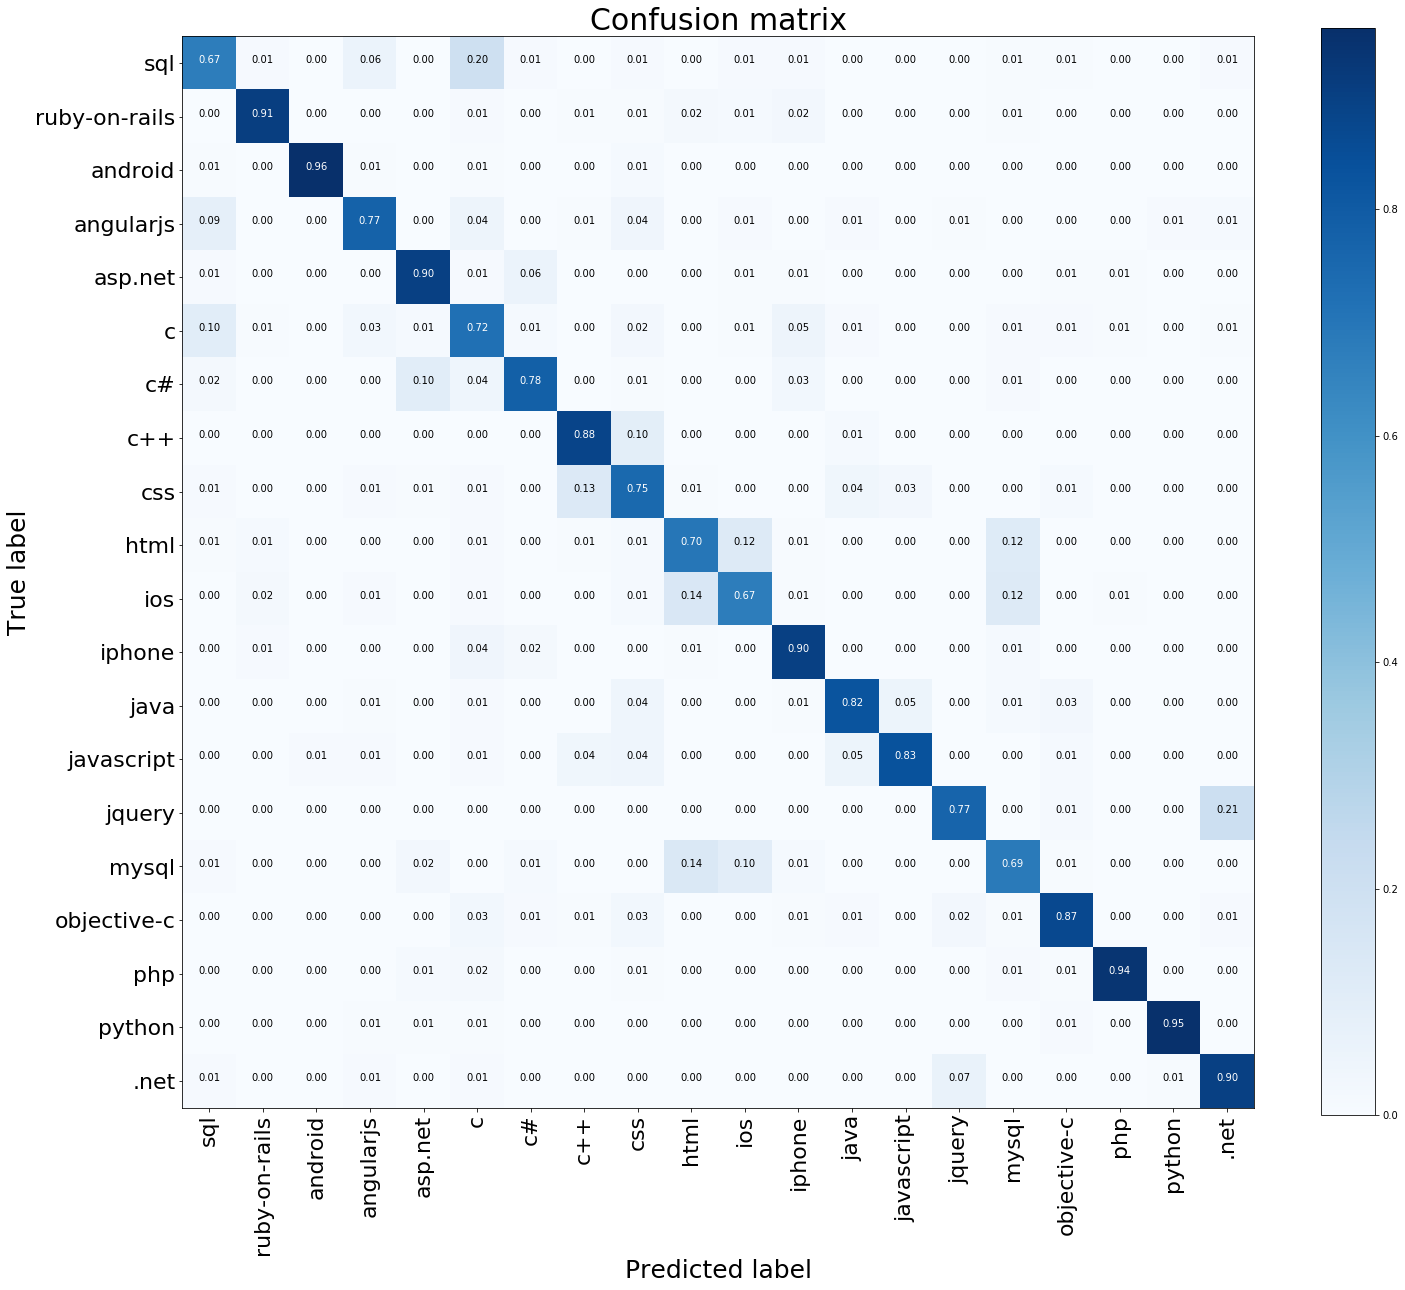

In [9]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_tf = model_tf.predict(model_data_tf['x_test'], batch_size=best_model_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_tf = np.array([np.argmax(val) for val in prediction_val_tf])
y_true_processed_tf = np.array([np.argmax(val) for val in model_data_tf['y_test']])

# If you want to see the OneVSAll ROC Curves of each class uncomment the below line
# plot_roc_curve(model_data_tf['y_test'], prediction_val_tf, Classes, 1)

# If you want to see the OneVSAll Precission Recall Curves of each class, comment out the below line
# plot_precision_recall_curve(model_data_tf['y_test'], prediction_val_tf, Classes , 1)

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_tf, y_pred_processed_tf, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_tf, y_pred_processed_tf, Classes)

## MLP classifier in Keras using standardized tf*idf features

In [10]:
# 70% Train & 30% Test
# 70% Train-Dev % 30* Train-Dev 
model_data_sdr_tf = preprocess_data(data, 'tags', 'post',
                                    input_ins='as_tf_idf',
                                    cv_split_full=0.2,
                                    cv_split_dev=0.125,
                                    standarize=True
                                    )

In [11]:
TALOS_SDR_TF_LOG_FILENAME = 'talos_sdr_tf_log'
talos_sdr_tf_log_pathname = os.path.join(TALOS_DIR, TALOS_SDR_TF_LOG_FILENAME)

tf_idf_sdr_model_config = tf_idf_model_config.copy()
tf_idf_sdr_model_config.update({
    'model_type': ['keras_sdr_tf_idf_model']
})

##### Production configuration
history_model_sdr_tf_idf = ta.Scan(model_data_sdr_tf['x_train'],
                                   model_data_sdr_tf['y_train'],
                                   x_val=model_data_sdr_tf['x_train_dev'],
                                   y_val=model_data_sdr_tf['y_train_dev'],
                                   model=load_model,
                                   params=tf_idf_sdr_model_config,
                                   grid_downsample=0.2,
                                   print_params=True,
                                   last_epoch_value=True,
                                   seed=(123),
                                   dataset_name=talos_sdr_tf_log_pathname
                                   )


  0%|          | 0/38 [00:00<?, ?it/s]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


  3%|▎         | 1/38 [00:12<07:34, 12.27s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


  5%|▌         | 2/38 [00:25<07:30, 12.51s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


  8%|▊         | 3/38 [00:33<06:37, 11.35s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 11%|█         | 4/38 [00:46<06:35, 11.64s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 13%|█▎        | 5/38 [00:59<06:40, 12.14s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 16%|█▌        | 6/38 [01:20<07:55, 14.86s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 18%|█▊        | 7/38 [01:41<08:31, 16.50s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 21%|██        | 8/38 [01:53<07:41, 15.39s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 24%|██▎       | 9/38 [02:06<07:04, 14.62s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 26%|██▋       | 10/38 [02:19<06:33, 14.06s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 29%|██▉       | 11/38 [02:40<07:16, 16.18s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 32%|███▏      | 12/38 [02:52<06:29, 14.98s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 34%|███▍      | 13/38 [03:05<05:56, 14.27s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 37%|███▋      | 14/38 [03:25<06:27, 16.16s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 39%|███▉      | 15/38 [03:38<05:44, 14.97s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 42%|████▏     | 16/38 [03:50<05:14, 14.30s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 45%|████▍     | 17/38 [03:59<04:25, 12.66s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 47%|████▋     | 18/38 [04:20<05:03, 15.17s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 50%|█████     | 19/38 [04:42<05:27, 17.23s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 53%|█████▎    | 20/38 [04:55<04:47, 15.95s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 55%|█████▌    | 21/38 [05:17<05:00, 17.70s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 58%|█████▊    | 22/38 [05:25<03:57, 14.87s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 61%|██████    | 23/38 [05:38<03:34, 14.27s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 63%|██████▎   | 24/38 [05:51<03:14, 13.88s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 66%|██████▌   | 25/38 [06:04<02:56, 13.55s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 68%|██████▊   | 26/38 [06:17<02:41, 13.46s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 71%|███████   | 27/38 [06:29<02:23, 13.07s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 74%|███████▎  | 28/38 [06:41<02:05, 12.51s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 76%|███████▋  | 29/38 [06:48<01:39, 11.08s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 79%|███████▉  | 30/38 [06:57<01:23, 10.41s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 82%|████████▏ | 31/38 [07:17<01:33, 13.35s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 84%|████████▍ | 32/38 [07:30<01:19, 13.20s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 87%|████████▋ | 33/38 [07:38<00:58, 11.68s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 89%|████████▉ | 34/38 [08:00<00:58, 14.72s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 5, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 92%|█████████▏| 35/38 [08:22<00:50, 16.96s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 4, 'batch_size': 32, 'model_type': 'keras_sdr_tf_idf_model'}


 95%|█████████▍| 36/38 [08:43<00:35, 17.98s/it]

{'visualize_proccess': False, 'first_neuron': 64, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 10, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


 97%|█████████▋| 37/38 [08:50<00:14, 14.85s/it]

{'visualize_proccess': False, 'first_neuron': 128, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 7, 'batch_size': 64, 'model_type': 'keras_sdr_tf_idf_model'}


100%|██████████| 38/38 [09:03<00:00, 14.27s/it]


In [12]:
report_sdr_stf = ta.Reporting(history_model_sdr_tf_idf)
best_model_sdr_idx = report_sdr_stf.data['val_f1'].idxmax()
best_model_sdr_params = report_sdr_stf.data.loc[best_model_sdr_idx].to_dict()
best_model_sdr_params

{'round_epochs': 3,
 'val_loss': 0.5323835740089417,
 'val_f1': 0.8345781064033508,
 'val_categorical_accuracy': 0.83025,
 'loss': 0.36043649936573846,
 'f1': 0.8818983540534974,
 'categorical_accuracy': 0.89225,
 'visualize_proccess': 'False',
 'first_neuron': 128,
 'activation': 'relu',
 'dropout': 0.2,
 'number_of_hidden_layers': 0,
 'shapes': 'funnel',
 'epochs': 4,
 'batch_size': 32,
 'model_type': 'keras_sdr_tf_idf_model'}

In [13]:
model_sdr_tf_history, model_sdr_tf = load_model(model_data_sdr_tf['x_train'],
                                                model_data_sdr_tf['y_train'],
                                                model_data_sdr_tf['x_train_dev'],
                                                model_data_sdr_tf['y_train_dev'],
                                                best_model_sdr_params)

### Visualize Model History Scores

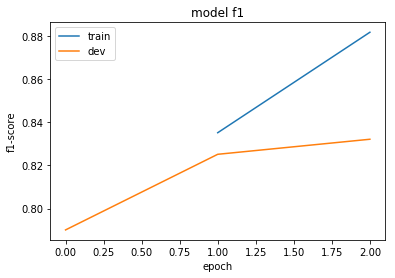

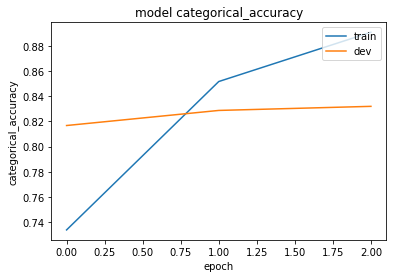

In [14]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt
%matplotlib inline

plot_history_metrics(history_obj=model_sdr_tf_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [15]:
score_sdr_tf = model_sdr_tf.evaluate(model_data_sdr_tf['x_test'],
                                     model_data_sdr_tf['y_test'],
                                     batch_size=best_model_sdr_params['batch_size'],
                                     verbose=1)

print('\nTest f1: %.4f' % (score_sdr_tf[1]))
print('\nTest categorical accuracy: %.4f'% (score_sdr_tf[2]))

8000/8000 [==============================] - 0s 46us/step

Test f1: 0.8189

Test categorical accuracy: 0.8170


### Visualize Prediction Perfomance of **standardized** TF-IDF  model

--------------------------------------------------------------------------------
Accuracy Score: 81.70%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.699     0.662     0.680       400
           1      0.930     0.902     0.916       400
           2      0.980     0.960     0.970       400
           3      0.833     0.772     0.802       400
           4      0.824     0.902     0.862       400
           5      0.597     0.723     0.654       400
           6      0.854     0.762     0.806       400
           7      0.848     0.865     0.856       400
           8      0.702     0.748     0.724       400
           9      0.679     0.677     0.678       400
          10      0.664     0.713     0.688       400
          11      0.879     0.875     0.877       400
       

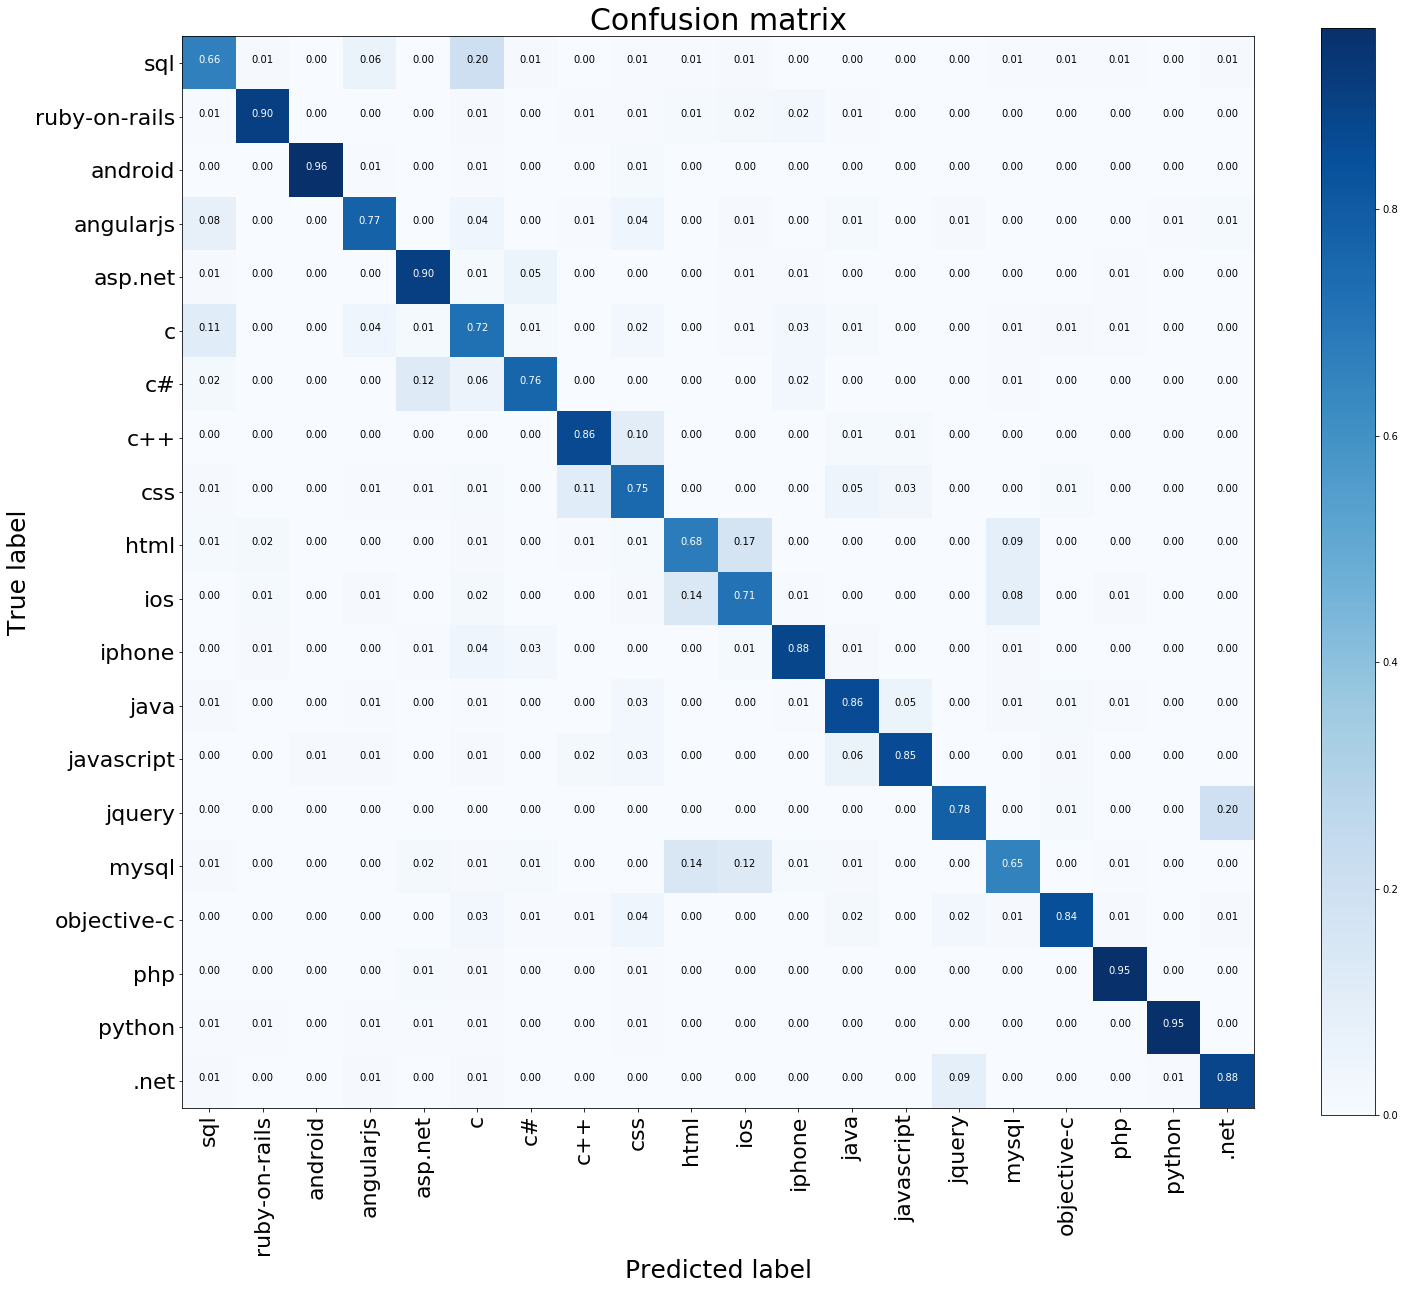

In [16]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_sdr_tf = model_sdr_tf.predict(model_data_sdr_tf['x_test'],
                                             batch_size=best_model_sdr_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_sdr_tf = np.array([np.argmax(val) for val in prediction_val_sdr_tf])
y_true_processed_sdr_tf = np.array([np.argmax(val) for val in model_data_sdr_tf['y_test']])

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_sdr_tf, y_pred_processed_sdr_tf , Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_sdr_tf, y_pred_processed_sdr_tf , Classes)